# Identifying Odd Births and Deaths
Tim Tyree <br>
May 26, 2020

### __Goals__
1. quantify number of births/death numbers that are odd integers
2. select those odd births/deaths
3. find out what they have in common?

__TODO: Simulation Workflow - save buffers when odd birth/death occurs__<br>
- TODO: add function that compares previous to current birth-death rate and checks for a certain change
- TODO: save buffer every time an odd birth/death occurs

### initialize/load the data

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, os
from pylab import imshow, show
import skimage as sk
from skimage import measure, filters
from PIL import Image
import imageio

if 'nb_dir' not in globals():
    nb_dir = os.getcwd()

width = 512
height = 512
channel_no = 3

from lib.minimal_model import *
from lib.TexturePlot import *
from lib.get_tips import *
from lib.minimal_model import *
from lib.intersection import *
from lib.ProgressBar import *

#TODO: use cuda via numba
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
width = 512
height = 512
channel_no = 3

%autocall 1
%load_ext autoreload
%autoreload 2

@njit
def ifilter(texture):
    return texture > 0

Automatic calling is: Smart


In [3]:
# data_dir = 'Data/tip_log_circle6_at_time_3012.8.csv'
data_dir = 'Data/tip_log_circle6_params_changed_at_time_1800.0.csv'
df = pd.read_csv(data_dir)
df.head()

,s,t,x,y
0,"[(4, 4)]",0.1,"[[208.26301996295518, 206.2455030716099]]","[[186.98311401050975, 327.0213442661851]]"
1,"[(4, 4)]",0.2,"[[208.3901408608393, 206.2192121600748]]","[[186.44925138676243, 327.0601409464275]]"
2,"[(4, 4)]",0.3,"[[208.35858046013357, 206.1988479988617]]","[[186.3915276332306, 327.110001482903]]"
3,"[(4, 4)]",0.4,"[[208.33072119906782, 206.33878858034495]]","[[186.32810522409392, 327.6448642235999]]"
4,"[(4, 4)]",0.5,"[[208.30230358696605, 206.3125517373314]]","[[186.27495102612446, 327.7058801495779]]"


# Compute how often odd births/deaths occur

In [20]:
#compute the number of spiral tips
t_values = []
n_values = []
for j in range(df.t.size):
    t = df.iloc[j].t
    t_values.append(t)
    x = df.iloc[j].x
    n = x.replace('[','').replace(']','').count('.')
    n_values.append(n)

In [21]:
df['n'] = n_values
df['dn'] = df['n'].diff()

In [53]:
dn_values = np.diff(np.array(n_values))
#select the birth/deaths values that are odd
set_bd = list(set(dn_values))
boo = [dn%2==1 for dn in set_bd]
set_odd = np.array(set_bd)[boo] # the set of all odd birth/death types
print(f"odd birthdeaths occured in numbers {set_odd}.")
# plt.hist(np.diff(np.array(n_values)), bins = 2)

odd birthdeaths occured in numbers [ 1  3 -9 -7 -1 -3].


In [54]:
df.dropna().groupby('dn').describe()['n','count']

dn
-14.0        1.0
-12.0        1.0
-10.0        2.0
-9.0         1.0
-8.0         3.0
-7.0         1.0
-6.0        12.0
-4.0        33.0
-3.0         3.0
-2.0       227.0
-1.0        32.0
 0.0     17358.0
 1.0        33.0
 2.0       240.0
 3.0         2.0
 4.0        38.0
 6.0         5.0
 10.0        2.0
 12.0        1.0
 14.0        1.0
 18.0        1.0
 20.0        1.0
 26.0        1.0
Name: (n, count), dtype: float64

In [61]:
series_bd = df.loc[df.dn!=0].dropna().dn #a time series of when/where nontrivial birth/deaths occur
num_odds = (66+6)
num_total = len(series_bd.values)
print(f"the percent of birth/deaths that were odd was {100*num_odds/num_total:.1f}%.")

the percent of birth/deaths that were odd was 11.2%.


In [ ]:
# query = f'dn=={1}'

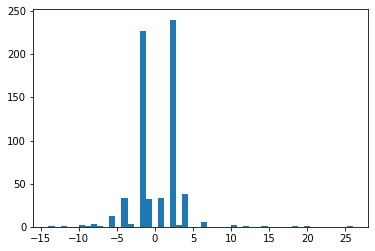

In [51]:
plt.hist(series_bd.values, bins = 50)
plt.label('time', fontsize=24)
plt.ylabel('number of spiral tips', fontsize=24)
plt.show()

Text(0, 0.5, 'number of spiral tips')

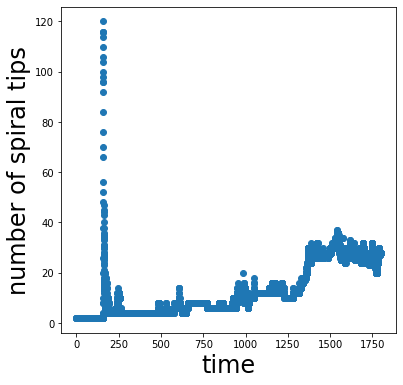

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=t_values, y=n_values)
dn_values = np.diff(np.array(n_values))
ax.set_xlabel('time', fontsize=24)
ax.set_ylabel('number of spiral tips', fontsize=24)